## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20)
y=-2*x+1

In [3]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
dict={'x0':1,'x1':x , 'y':y}

In [6]:

df=pd.DataFrame(dict)
df = df.sample(frac=1)

In [7]:
df.head()

,x0,x1,y
8,1,3.265306,-5.530612
20,1,8.163265,-15.326531
3,1,1.224490,-1.448980
10,1,4.081633,-7.163265
37,1,15.102041,-29.204082


In [8]:
col=df.shape[1]
x=np.matrix(df.iloc[:,0:col-1])
y=np.matrix(df.iloc[:,col-1:col])

In [9]:
theta=np.matrix([0,0])
theta

matrix([[0, 0]])

In [10]:
alpha=0.01
itera=100
noBatch=10

In [11]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [12]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

In [13]:
def mini_Batch_GD(x,y,theta,lr,iteration,noBatch):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    th0=[]
    th1=[]
    h=[]
    batch_size=int(len(y)/ noBatch)
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):
            th0.append(theta[:,0])
            th1.append(theta[:,1])
            h.append(x*theta.T)
            x_i=x[j:j+batch_size]
            y_i=y[j:j+batch_size]
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,th0,th1,h

In [14]:
th_op,cost,th0,th1,hypo = mini_Batch_GD(x,y,theta,alpha,itera,noBatch)

In [15]:
th_op

matrix([[ 0.11516197, -1.93458242]])

Text(0, 0.5, 'Cost Value')

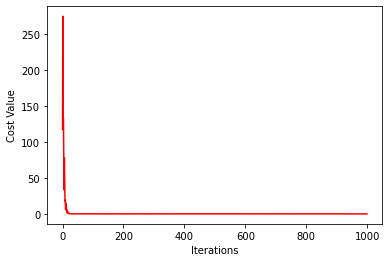

In [16]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

In [17]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'y1- data')

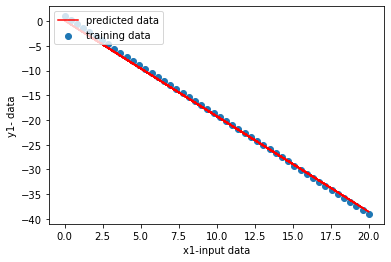

In [18]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

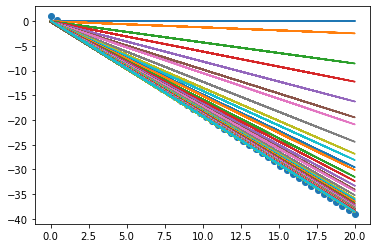

In [19]:
plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

In [20]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

# With shuffling

Text(0, 0.5, 'Cost Value')

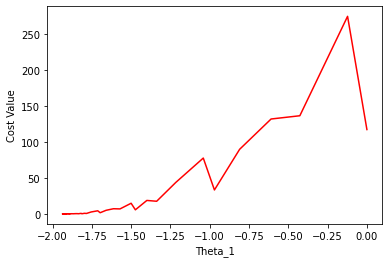

In [21]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

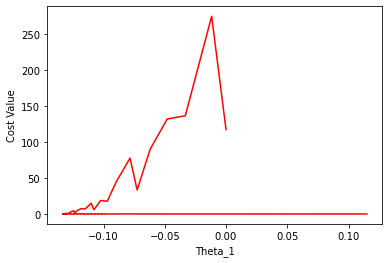

In [22]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

# Without shuffling

Text(0, 0.5, 'Cost Value')

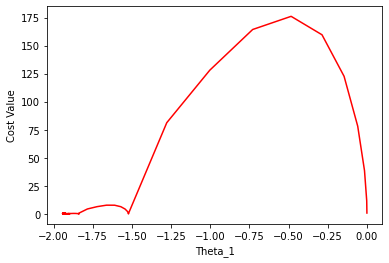

In [84]:

fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

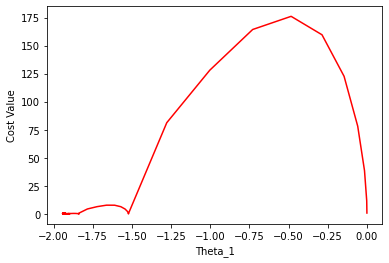

In [85]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [23]:
r2_score(df.y , y_hat)

0.9985467456362521

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [24]:
alpha=0.01
itera=100

In [25]:
def Stocastic_GD(x,y,theta,lr,iteration):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    th0=[]
    th1=[]
    h=[]
    batch_size=1
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):
            th0.append(theta[:,0])
            th1.append(theta[:,1])
            h.append(x*theta.T)
            x_i=x[j:j+batch_size]
            y_i=y[j:j+batch_size]
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,th0,th1,h

In [26]:
th_op,cost,th0,th1,hypo = Stocastic_GD(x,y,theta,alpha,itera)

In [27]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

In [28]:
th_op

matrix([[ 0.11571839, -1.93496944]])

Text(0, 0.5, 'Cost Value')

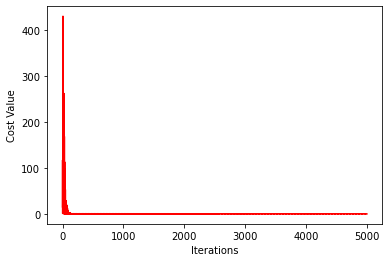

In [29]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

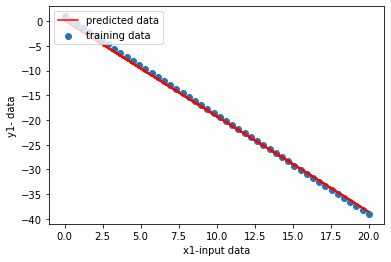

In [30]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

Text(0, 0.5, 'Cost Value')

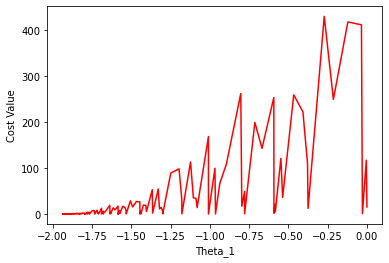

In [31]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

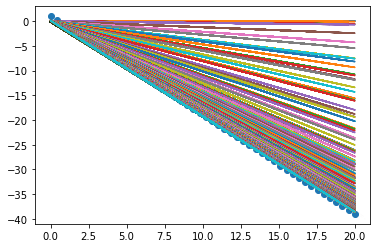

In [32]:
plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

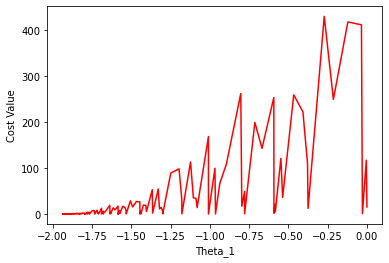

In [33]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [34]:
r2_score(df.y , y_hat)

0.9985482721657715